In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cvbnm/mRNA_LncRNA_Breast_Cancer_DEF.csv
/kaggle/input/disease/mRNA_LncRNA_Breast_Cancer.csv
/kaggle/input/healthy-control/mRNA_LncRNA_Breast_Cancer_HC.csv


In [34]:
disease = pd.read_csv('../input/disease/mRNA_LncRNA_Breast_Cancer.csv')
disease.head()





,ID,gene_type,gene_name,chr,start,end,SRR1982584,SRR1982585,SRR1982586,SRR1982587,...,SRR12519963,SRR12519966,SRR12520061,SRR12520062,SRR12520063,SRR12520064,SRR12520065,SRR12520066,SRR12520067,SRR12520068
0,ENSG00000000003,protein_coding,TSPAN6,chrX,99882105,99894988,3.531121,3.698009,3.560307,3.691010,...,4.025283,3.490474,4.521152,4.133530,4.348581,3.570701,3.456795,4.509670,4.154273,5.186490
1,ENSG00000000005,protein_coding,TNMD,chrX,99839933,99854882,3.478565,3.476114,3.601378,3.621774,...,3.616575,3.538978,3.400287,3.548263,4.056340,4.247117,3.397698,3.667516,3.654204,3.685913
2,ENSG00000000419,protein_coding,DPM1,chr20,49551404,49575092,4.989771,4.621628,4.789651,4.948079,...,5.844801,5.008933,5.834695,5.412038,5.108976,5.574968,5.812555,4.844923,5.566663,5.750271
3,ENSG00000000457,protein_coding,SCYL3,chr1,169818772,169863408,5.117080,3.656773,5.175279,3.670506,...,5.149449,4.638515,4.096462,5.281471,4.687943,3.916556,5.229351,4.676812,5.477494,5.242190
4,ENSG00000000460,protein_coding,C1orf112,chr1,169631245,169823221,6.004518,6.997380,5.199540,6.368697,...,6.487086,5.350374,6.337223,6.552065,5.690816,5.768163,5.616772,5.362599,5.212713,5.461523


In [35]:
disease.drop(['ID', 'gene_type','chr','start','end'], axis=1,inplace=True)
disease

,gene_name,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,...,SRR12519963,SRR12519966,SRR12520061,SRR12520062,SRR12520063,SRR12520064,SRR12520065,SRR12520066,SRR12520067,SRR12520068
0,TSPAN6,3.531121,3.698009,3.560307,3.691010,5.161409,4.302276,3.499725,3.526075,3.989596,...,4.025283,3.490474,4.521152,4.133530,4.348581,3.570701,3.456795,4.509670,4.154273,5.186490
1,TNMD,3.478565,3.476114,3.601378,3.621774,3.561265,3.684768,4.480825,3.408897,4.060781,...,3.616575,3.538978,3.400287,3.548263,4.056340,4.247117,3.397698,3.667516,3.654204,3.685913
2,DPM1,4.989771,4.621628,4.789651,4.948079,5.241633,3.119909,5.583777,5.817659,5.593284,...,5.844801,5.008933,5.834695,5.412038,5.108976,5.574968,5.812555,4.844923,5.566663,5.750271
3,SCYL3,5.117080,3.656773,5.175279,3.670506,4.263683,5.648737,4.021564,5.153811,5.230483,...,5.149449,4.638515,4.096462,5.281471,4.687943,3.916556,5.229351,4.676812,5.477494,5.242190
4,C1orf112,6.004518,6.997380,5.199540,6.368697,4.638235,5.423660,6.530095,5.269115,6.935990,...,6.487086,5.350374,6.337223,6.552065,5.690816,5.768163,5.616772,5.362599,5.212713,5.461523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31259,AC096992.2,5.307285,3.995691,4.901662,4.922607,4.032820,4.028397,3.834919,4.340739,4.257562,...,3.513858,4.992428,3.481686,4.202898,4.709036,4.346462,4.850787,4.544685,4.338240,4.792166
31260,AC104836.1,3.329158,3.396044,3.453959,3.329892,3.361005,3.441610,3.445782,3.325981,3.342970,...,3.117447,3.580403,3.568227,3.544981,3.510155,3.522759,3.415247,3.604678,3.550751,3.598692
31261,AC008264.2,3.431191,3.444494,3.459901,3.508229,3.400322,3.519449,3.488327,3.440266,3.377206,...,3.105280,3.426668,3.452258,3.464144,3.473439,3.477747,3.405941,3.488797,3.472729,3.523868
31262,AP000229.1,4.754165,3.574681,4.036134,3.721439,4.142506,4.091970,5.149293,3.227631,4.549889,...,4.360083,3.895112,3.411866,4.033577,3.945638,3.352751,5.042390,4.361305,4.276991,4.427319


In [36]:
disease.set_index('gene_name', inplace=True)
disease


,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,SRR1982593,...,SRR12519963,SRR12519966,SRR12520061,SRR12520062,SRR12520063,SRR12520064,SRR12520065,SRR12520066,SRR12520067,SRR12520068
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3.531121,3.698009,3.560307,3.691010,5.161409,4.302276,3.499725,3.526075,3.989596,3.721829,...,4.025283,3.490474,4.521152,4.133530,4.348581,3.570701,3.456795,4.509670,4.154273,5.186490
TNMD,3.478565,3.476114,3.601378,3.621774,3.561265,3.684768,4.480825,3.408897,4.060781,3.832138,...,3.616575,3.538978,3.400287,3.548263,4.056340,4.247117,3.397698,3.667516,3.654204,3.685913
DPM1,4.989771,4.621628,4.789651,4.948079,5.241633,3.119909,5.583777,5.817659,5.593284,4.845054,...,5.844801,5.008933,5.834695,5.412038,5.108976,5.574968,5.812555,4.844923,5.566663,5.750271
SCYL3,5.117080,3.656773,5.175279,3.670506,4.263683,5.648737,4.021564,5.153811,5.230483,3.897318,...,5.149449,4.638515,4.096462,5.281471,4.687943,3.916556,5.229351,4.676812,5.477494,5.242190
C1orf112,6.004518,6.997380,5.199540,6.368697,4.638235,5.423660,6.530095,5.269115,6.935990,5.906851,...,6.487086,5.350374,6.337223,6.552065,5.690816,5.768163,5.616772,5.362599,5.212713,5.461523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC096992.2,5.307285,3.995691,4.901662,4.922607,4.032820,4.028397,3.834919,4.340739,4.257562,4.676159,...,3.513858,4.992428,3.481686,4.202898,4.709036,4.346462,4.850787,4.544685,4.338240,4.792166
AC104836.1,3.329158,3.396044,3.453959,3.329892,3.361005,3.441610,3.445782,3.325981,3.342970,3.420083,...,3.117447,3.580403,3.568227,3.544981,3.510155,3.522759,3.415247,3.604678,3.550751,3.598692
AC008264.2,3.431191,3.444494,3.459901,3.508229,3.400322,3.519449,3.488327,3.440266,3.377206,3.489652,...,3.105280,3.426668,3.452258,3.464144,3.473439,3.477747,3.405941,3.488797,3.472729,3.523868


In [37]:
disease.transpose()

disease.head()
#1=disease

,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,SRR1982593,...,SRR12519963,SRR12519966,SRR12520061,SRR12520062,SRR12520063,SRR12520064,SRR12520065,SRR12520066,SRR12520067,SRR12520068
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3.531121,3.698009,3.560307,3.691010,5.161409,4.302276,3.499725,3.526075,3.989596,3.721829,...,4.025283,3.490474,4.521152,4.133530,4.348581,3.570701,3.456795,4.509670,4.154273,5.186490
TNMD,3.478565,3.476114,3.601378,3.621774,3.561265,3.684768,4.480825,3.408897,4.060781,3.832138,...,3.616575,3.538978,3.400287,3.548263,4.056340,4.247117,3.397698,3.667516,3.654204,3.685913
DPM1,4.989771,4.621628,4.789651,4.948079,5.241633,3.119909,5.583777,5.817659,5.593284,4.845054,...,5.844801,5.008933,5.834695,5.412038,5.108976,5.574968,5.812555,4.844923,5.566663,5.750271
SCYL3,5.117080,3.656773,5.175279,3.670506,4.263683,5.648737,4.021564,5.153811,5.230483,3.897318,...,5.149449,4.638515,4.096462,5.281471,4.687943,3.916556,5.229351,4.676812,5.477494,5.242190
C1orf112,6.004518,6.997380,5.199540,6.368697,4.638235,5.423660,6.530095,5.269115,6.935990,5.906851,...,6.487086,5.350374,6.337223,6.552065,5.690816,5.768163,5.616772,5.362599,5.212713,5.461523


In [38]:
hc=pd.read_csv('../input/healthy-control/mRNA_LncRNA_Breast_Cancer_HC.csv')
hc.head()

hc.drop(hc.iloc[:, 58:402],axis = 1,inplace=True)
hc.drop(['ID', 'gene_type','chr','start','end'], axis=1,inplace=True)
hc.set_index('gene_name', inplace=True)
hc






,SRR1982696,SRR1982697,SRR1982698,SRR1982700,SRR1982701,SRR1982702,SRR1982703,SRR1982704,SRR1982705,SRR1982706,...,SRR1982741,SRR1982742,SRR1982743,SRR1982744,SRR1982745,SRR1982746,SRR1982747,SRR1982748,SRR1982749,SRR5020114
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4.089455,4.443939,5.143877,4.003596,3.572577,3.620636,4.287321,4.101944,5.100315,4.683207,...,4.799513,3.946707,4.216226,3.723535,4.643065,4.829223,4.205909,4.504397,3.798426,3.162853
TNMD,3.505440,4.355113,3.139102,3.343970,3.647022,3.985972,3.546296,4.147110,3.975652,3.794583,...,3.528012,4.300480,3.350624,4.079610,3.772613,3.766550,3.655852,4.706982,4.000457,3.109486
DPM1,5.933398,5.441341,5.746432,5.619300,3.917265,5.466384,5.830426,4.081751,6.239011,4.876949,...,5.314895,5.811033,5.849958,5.153689,5.898230,4.823420,5.418734,5.789079,5.445888,5.592609
SCYL3,4.743463,4.834142,5.606450,5.971482,5.309749,5.872583,5.635347,5.886769,6.315736,5.114545,...,4.995332,4.810938,5.848163,5.180766,5.285906,4.672054,5.151762,5.187147,5.038949,6.113806
C1orf112,6.097934,6.543829,5.525770,5.736069,7.215816,5.947301,6.050674,5.699657,5.961743,5.582926,...,5.609998,5.662425,5.837090,5.878838,6.133744,5.780429,5.374160,5.630399,5.718855,6.549790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC096992.2,4.425672,5.326214,3.131257,5.972933,3.978551,4.285067,4.962931,4.162982,3.877331,4.578233,...,5.085713,3.949999,4.605270,3.913395,4.253844,4.140584,4.326551,4.859777,4.803418,5.851140
AC104836.1,3.460658,4.115309,3.124193,4.112676,2.982779,3.520717,3.584860,3.537218,3.694059,3.423377,...,3.241307,3.181421,3.577532,3.768380,3.444815,3.785521,3.555630,3.170120,3.829609,3.405164
AC008264.2,3.303838,3.242585,4.262807,3.280714,3.125778,3.299086,3.665100,3.313473,3.781197,3.482050,...,3.378441,4.005069,3.358659,3.696490,3.290314,3.280040,3.282193,3.346586,3.301289,3.440862


In [39]:
hc.transpose()
hc.head()
#0=healthy

,SRR1982696,SRR1982697,SRR1982698,SRR1982700,SRR1982701,SRR1982702,SRR1982703,SRR1982704,SRR1982705,SRR1982706,...,SRR1982741,SRR1982742,SRR1982743,SRR1982744,SRR1982745,SRR1982746,SRR1982747,SRR1982748,SRR1982749,SRR5020114
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4.089455,4.443939,5.143877,4.003596,3.572577,3.620636,4.287321,4.101944,5.100315,4.683207,...,4.799513,3.946707,4.216226,3.723535,4.643065,4.829223,4.205909,4.504397,3.798426,3.162853
TNMD,3.505440,4.355113,3.139102,3.343970,3.647022,3.985972,3.546296,4.147110,3.975652,3.794583,...,3.528012,4.300480,3.350624,4.079610,3.772613,3.766550,3.655852,4.706982,4.000457,3.109486
DPM1,5.933398,5.441341,5.746432,5.619300,3.917265,5.466384,5.830426,4.081751,6.239011,4.876949,...,5.314895,5.811033,5.849958,5.153689,5.898230,4.823420,5.418734,5.789079,5.445888,5.592609
SCYL3,4.743463,4.834142,5.606450,5.971482,5.309749,5.872583,5.635347,5.886769,6.315736,5.114545,...,4.995332,4.810938,5.848163,5.180766,5.285906,4.672054,5.151762,5.187147,5.038949,6.113806
C1orf112,6.097934,6.543829,5.525770,5.736069,7.215816,5.947301,6.050674,5.699657,5.961743,5.582926,...,5.609998,5.662425,5.837090,5.878838,6.133744,5.780429,5.374160,5.630399,5.718855,6.549790


In [40]:
disease.head()

,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,SRR1982593,...,SRR12519963,SRR12519966,SRR12520061,SRR12520062,SRR12520063,SRR12520064,SRR12520065,SRR12520066,SRR12520067,SRR12520068
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3.531121,3.698009,3.560307,3.691010,5.161409,4.302276,3.499725,3.526075,3.989596,3.721829,...,4.025283,3.490474,4.521152,4.133530,4.348581,3.570701,3.456795,4.509670,4.154273,5.186490
TNMD,3.478565,3.476114,3.601378,3.621774,3.561265,3.684768,4.480825,3.408897,4.060781,3.832138,...,3.616575,3.538978,3.400287,3.548263,4.056340,4.247117,3.397698,3.667516,3.654204,3.685913
DPM1,4.989771,4.621628,4.789651,4.948079,5.241633,3.119909,5.583777,5.817659,5.593284,4.845054,...,5.844801,5.008933,5.834695,5.412038,5.108976,5.574968,5.812555,4.844923,5.566663,5.750271
SCYL3,5.117080,3.656773,5.175279,3.670506,4.263683,5.648737,4.021564,5.153811,5.230483,3.897318,...,5.149449,4.638515,4.096462,5.281471,4.687943,3.916556,5.229351,4.676812,5.477494,5.242190
C1orf112,6.004518,6.997380,5.199540,6.368697,4.638235,5.423660,6.530095,5.269115,6.935990,5.906851,...,6.487086,5.350374,6.337223,6.552065,5.690816,5.768163,5.616772,5.362599,5.212713,5.461523


In [41]:
hc.head()
hc.reset_index(drop=True)
hc.shape

(31264, 53)

In [42]:
final = pd.concat([disease, hc], axis = 1)
final_1=final.transpose()
final_1



gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AL157392.4,AL133215.3,AL391069.2,AL354760.1,AL139339.2,AC096992.2,AC104836.1,AC008264.2,AP000229.1,AC098479.1
SRR1982584,3.531121,3.478565,4.989771,5.117080,6.004518,6.851470,5.063035,6.104895,4.421300,5.331155,...,3.858231,3.417038,3.629740,3.441785,3.618823,5.307285,3.329158,3.431191,4.754165,3.786053
SRR1982585,3.698009,3.476114,4.621628,3.656773,6.997380,6.558528,3.465075,6.786273,3.274005,4.468003,...,3.322847,3.429089,3.410673,3.441207,3.387154,3.995691,3.396044,3.444494,3.574681,3.387605
SRR1982586,3.560307,3.601378,4.789651,5.175279,5.199540,5.718792,4.028726,6.429269,4.631544,5.121304,...,3.455650,3.425289,3.417457,3.410889,3.386613,4.901662,3.453959,3.459901,4.036134,3.434222
SRR1982587,3.691010,3.621774,4.948079,3.670506,6.368697,5.760801,3.969900,6.429351,3.633456,4.539802,...,3.429749,3.477803,3.455616,3.528557,3.385088,4.922607,3.329892,3.508229,3.721439,3.475705
SRR1982588,5.161409,3.561265,5.241633,4.263683,4.638235,6.408521,3.670929,6.179037,3.590916,5.427704,...,3.464470,3.384924,3.376939,4.170424,3.387972,4.032820,3.361005,3.400322,4.142506,3.425356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1982746,4.829223,3.766550,4.823420,4.672054,5.780429,8.267059,4.372203,5.905255,5.186718,5.354379,...,4.363073,3.757566,3.247867,3.341886,3.389207,4.140584,3.785521,3.280040,4.700553,3.915092
SRR1982747,4.205909,3.655852,5.418734,5.151762,5.374160,7.558376,5.322944,5.722495,5.182634,5.123746,...,4.365793,4.001572,3.236585,3.314298,3.385584,4.326551,3.555630,3.282193,4.767310,4.084087
SRR1982748,4.504397,4.706982,5.789079,5.187147,5.630399,7.677928,5.407628,6.081520,5.856561,4.700505,...,3.349698,3.359785,3.970193,3.408421,3.386759,4.859777,3.170120,3.346586,4.255942,3.359317
SRR1982749,3.798426,4.000457,5.445888,5.038949,5.718855,7.669018,5.319801,6.440538,5.455124,5.262636,...,4.054223,3.337211,3.919356,3.362312,3.386518,4.803418,3.829609,3.301289,4.167701,3.204634


In [43]:

result = []
for i in range(53):
        result.append('1')
for i in range(53):
        result.append('0')
len(result)

final_2 = final_1.assign(Diagnosis = result)
final_2

final_3=final_2.loc[:, final_2.columns != 'Diagnosis']

    


In [44]:
diag=final_2.loc[:, final_2.columns == 'Diagnosis']
diag

gene_name,Diagnosis
SRR1982584,1
SRR1982585,1
SRR1982586,1
SRR1982587,1
SRR1982588,1
...,...
SRR1982746,0
SRR1982747,0
SRR1982748,0
SRR1982749,0


In [47]:
stats=pd.read_csv('../input/cvbnm/mRNA_LncRNA_Breast_Cancer_DEF.csv')
stats



,ID,gene_type,gene_name,chr,start,end,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000000003,protein_coding,TSPAN6,chrX,99882105,99894988,8.558542,-0.728396,0.280318,-2.598466,9.364138e-03,1.193382e-02
1,ENSG00000000005,protein_coding,TNMD,chrX,99839933,99854882,3.043350,-1.097930,0.339952,-3.229657,1.239386e-03,1.681633e-03
2,ENSG00000000419,protein_coding,DPM1,chr20,49551404,49575092,34.037813,-0.593756,0.113746,-5.220021,1.790000e-07,3.193200e-07
3,ENSG00000000457,protein_coding,SCYL3,chr1,169818772,169863408,34.416349,-1.369119,0.171635,-7.976905,1.500000e-15,5.848550e-15
4,ENSG00000000460,protein_coding,C1orf112,chr1,169631245,169823221,49.495282,0.128052,0.102876,1.244730,2.132310e-01,2.417923e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
31259,ENSG00000273486,lncRNA,AC096992.2,chr3,136556180,136557863,13.811310,-0.634239,0.172146,-3.684313,2.293200e-04,3.264630e-04
31260,ENSG00000273487,lncRNA,AC104836.1,chr1,92654794,92656264,0.825096,-1.954176,0.465867,-4.194707,2.730000e-05,4.140010e-05
31261,ENSG00000273489,lncRNA,AC008264.2,chr7,131178723,131182453,0.546069,-1.135204,0.605079,-1.876124,6.063819e-02,7.257455e-02
31262,ENSG00000273492,lncRNA,AP000229.1,chr21,27543189,27589700,17.109380,-1.964058,0.250434,-7.842620,4.410000e-15,1.626760e-14


In [48]:
stats_1= stats.sort_values('padj')

stats_1.drop(['ID', 'gene_type','chr','start','end','baseMean','lfcSE','stat','pvalue'], axis=1,inplace=True)

stats_1.reset_index(drop=True)

,gene_name,log2FoldChange,padj
0,LINC00278,-27.783063,0.000000e+00
1,AL391645.1,-18.126664,5.803900e-296
2,MSH2-OT1,-22.779189,7.743500e-197
3,AL596211.1,-18.954885,4.335600e-185
4,OR51L1,-17.382418,9.244700e-159
...,...,...,...
31259,AC007029.1,-0.002558,9.964304e-01
31260,MAP1LC3A,-0.000482,9.968525e-01
31261,LRCOL1,0.002411,9.973083e-01
31262,TMEM210,0.010309,9.981064e-01


In [49]:
stats_1.set_index('gene_name', inplace=True)

stats_1

,log2FoldChange,padj
gene_name,,
LINC00278,-27.783063,0.000000e+00
AL391645.1,-18.126664,5.803900e-296
MSH2-OT1,-22.779189,7.743500e-197
AL596211.1,-18.954885,4.335600e-185
OR51L1,-17.382418,9.244700e-159
...,...,...
AC007029.1,-0.002558,9.964304e-01
MAP1LC3A,-0.000482,9.968525e-01
LRCOL1,0.002411,9.973083e-01


In [50]:
final_4=final_3.transpose()
final_4

,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,SRR1982593,...,SRR1982741,SRR1982742,SRR1982743,SRR1982744,SRR1982745,SRR1982746,SRR1982747,SRR1982748,SRR1982749,SRR5020114
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3.531121,3.698009,3.560307,3.691010,5.161409,4.302276,3.499725,3.526075,3.989596,3.721829,...,4.799513,3.946707,4.216226,3.723535,4.643065,4.829223,4.205909,4.504397,3.798426,3.162853
TNMD,3.478565,3.476114,3.601378,3.621774,3.561265,3.684768,4.480825,3.408897,4.060781,3.832138,...,3.528012,4.300480,3.350624,4.079610,3.772613,3.766550,3.655852,4.706982,4.000457,3.109486
DPM1,4.989771,4.621628,4.789651,4.948079,5.241633,3.119909,5.583777,5.817659,5.593284,4.845054,...,5.314895,5.811033,5.849958,5.153689,5.898230,4.823420,5.418734,5.789079,5.445888,5.592609
SCYL3,5.117080,3.656773,5.175279,3.670506,4.263683,5.648737,4.021564,5.153811,5.230483,3.897318,...,4.995332,4.810938,5.848163,5.180766,5.285906,4.672054,5.151762,5.187147,5.038949,6.113806
C1orf112,6.004518,6.997380,5.199540,6.368697,4.638235,5.423660,6.530095,5.269115,6.935990,5.906851,...,5.609998,5.662425,5.837090,5.878838,6.133744,5.780429,5.374160,5.630399,5.718855,6.549790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC096992.2,5.307285,3.995691,4.901662,4.922607,4.032820,4.028397,3.834919,4.340739,4.257562,4.676159,...,5.085713,3.949999,4.605270,3.913395,4.253844,4.140584,4.326551,4.859777,4.803418,5.851140
AC104836.1,3.329158,3.396044,3.453959,3.329892,3.361005,3.441610,3.445782,3.325981,3.342970,3.420083,...,3.241307,3.181421,3.577532,3.768380,3.444815,3.785521,3.555630,3.170120,3.829609,3.405164
AC008264.2,3.431191,3.444494,3.459901,3.508229,3.400322,3.519449,3.488327,3.440266,3.377206,3.489652,...,3.378441,4.005069,3.358659,3.696490,3.290314,3.280040,3.282193,3.346586,3.301289,3.440862


In [52]:
final_5=final_4.reindex(stats_1.index, copy=False)


In [53]:
final_5

,SRR1982584,SRR1982585,SRR1982586,SRR1982587,SRR1982588,SRR1982589,SRR1982590,SRR1982591,SRR1982592,SRR1982593,...,SRR1982741,SRR1982742,SRR1982743,SRR1982744,SRR1982745,SRR1982746,SRR1982747,SRR1982748,SRR1982749,SRR5020114
gene_name,,,,,,,,,,,,,,,,,,,,,
LINC00278,3.281867,3.374580,3.360718,3.323472,3.359929,3.351488,3.341744,3.308010,3.353917,3.333316,...,3.829310,3.314836,3.849994,4.045290,3.213643,3.307171,4.127610,3.251604,3.258248,3.517063
AL391645.1,3.375479,3.364517,3.553569,3.445725,3.468679,3.422604,3.416448,3.307503,3.378964,3.745431,...,3.506356,3.486542,3.518337,3.582560,3.420551,3.364982,3.252759,3.609404,3.876628,3.209795
MSH2-OT1,3.410152,3.410278,3.451717,3.432259,3.410515,3.437345,3.439747,3.401864,3.379494,3.494365,...,3.409375,3.418560,3.404451,3.412300,3.357412,3.333506,3.320302,3.420355,3.360217,3.399100
AL596211.1,3.490016,3.504668,3.578802,3.560719,3.510500,3.574157,3.472975,3.452712,3.419648,3.680728,...,3.502798,3.535250,3.439470,3.381629,3.252294,3.240614,5.280566,3.852119,3.302154,3.440955
OR51L1,3.402692,3.434896,3.520720,3.466568,3.494457,3.431213,3.398673,3.380463,3.416369,3.586727,...,3.832384,3.449341,3.419675,3.450696,3.385541,3.771294,4.512086,3.481243,3.347787,4.039039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007029.1,3.452389,3.423354,3.345371,3.402543,3.367184,3.421308,3.439399,3.483631,3.382871,3.294840,...,3.376551,3.413643,3.375234,3.370406,3.396116,3.379229,3.909736,3.340078,3.396851,3.534559
MAP1LC3A,5.405901,5.189430,4.955077,5.622176,5.194409,5.685739,5.115441,4.151093,4.786778,3.758082,...,4.963598,4.124924,5.485992,5.209273,5.687759,5.314655,5.525654,4.578907,5.806199,5.551807
LRCOL1,3.500691,3.517887,3.527798,3.571262,3.471665,3.560321,3.507081,3.489623,3.466757,3.524261,...,3.459882,3.493484,3.446264,3.913539,3.371476,3.815681,3.386737,3.444127,3.410920,3.429213


In [54]:
final_6=final_5.transpose()
final_6

gene_name,LINC00278,AL391645.1,MSH2-OT1,AL596211.1,OR51L1,EIF4G2,ZNF185,CCNG1,SIAE,KLF2,...,CYTH2,AC010542.1,LY6G6C,CEP57L1,CLEC20A,AC007029.1,MAP1LC3A,LRCOL1,TMEM210,PIGK
SRR1982584,3.281867,3.375479,3.410152,3.490016,3.402692,13.255296,12.929848,10.900503,9.581623,4.782132,...,5.769141,3.345703,4.168472,6.028262,4.105958,3.452389,5.405901,3.500691,3.381248,7.164084
SRR1982585,3.374580,3.364517,3.410278,3.504668,3.434896,13.352398,13.017188,11.669332,9.726939,4.052367,...,6.668893,4.012868,4.732131,5.063409,3.482834,3.423354,5.189430,3.517887,3.391857,7.135002
SRR1982586,3.360718,3.553569,3.451717,3.578802,3.520720,12.883450,12.890819,11.012368,9.544807,5.021495,...,5.892332,3.357921,4.758200,6.665673,3.600724,3.345371,4.955077,3.527798,3.390615,6.649564
SRR1982587,3.323472,3.445725,3.432259,3.560719,3.466568,13.019596,11.962959,9.948367,7.858018,6.162899,...,6.101458,3.346525,3.288779,5.888570,4.519244,3.402543,5.622176,3.571262,3.379368,4.034613
SRR1982588,3.359929,3.468679,3.410515,3.510500,3.494457,13.647873,12.681914,10.964846,10.066461,5.219068,...,5.636041,3.972460,4.447588,6.635197,4.237076,3.367184,5.194409,3.471665,3.392388,6.543116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1982746,3.307171,3.364982,3.333506,3.240614,3.771294,11.781847,10.941308,9.879017,7.851362,8.039177,...,6.250674,4.199271,4.420582,6.122836,3.871918,3.379229,5.314655,3.815681,3.393379,6.900061
SRR1982747,4.127610,3.252759,3.320302,5.280566,4.512086,11.909181,10.997693,9.475356,7.412119,6.756540,...,6.275645,4.080307,5.056702,5.991717,3.244393,3.909736,5.525654,3.386737,3.379621,6.006742
SRR1982748,3.251604,3.609404,3.420355,3.852119,3.481243,11.911953,11.188766,9.677642,7.277937,7.997758,...,6.419935,3.802081,4.253820,5.973430,3.412843,3.340078,4.578907,3.444127,3.391654,6.935701
SRR1982749,3.258248,3.876628,3.360217,3.302154,3.347787,11.691298,11.095954,9.260300,7.512016,7.597964,...,5.664286,3.704987,4.604093,5.836537,3.290516,3.396851,5.806199,3.410920,3.387021,6.905348


In [56]:
diag_actual=diag.reindex(final_6.index, copy=False)
diag_actual

gene_name,Diagnosis
SRR1982584,1
SRR1982585,1
SRR1982586,1
SRR1982587,1
SRR1982588,1
...,...
SRR1982746,0
SRR1982747,0
SRR1982748,0
SRR1982749,0


In [57]:
final_8=final_6.iloc[:,1:1001]

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
X_data = final_6.iloc[:,1:1001]
y_data = diag_actual.loc[:,'Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1,random_state=42)

accuracy_all = []
cvs_all = []

y_data

SRR1982584    1
SRR1982585    1
SRR1982586    1
SRR1982587    1
SRR1982588    1
             ..
SRR1982746    0
SRR1982747    0
SRR1982748    0
SRR1982749    0
SRR5020114    0
Name: Diagnosis, Length: 106, dtype: object

Random Forest Accuracy: 81.82%
Cross validation score: 91.47% (+/- 14.05%)
Execution time: 1.1546 seconds 

            Importance
gene_name             
ZFHX3         0.057708
ARHGEF2       0.026073
NCAPD3        0.023948
TNKS          0.018985
SOAT1         0.018398
...                ...
PRKD2         0.000211
ARPP21-AS1    0.000211
DERA          0.000207
EOMES         0.000202
ARRDC1        0.000201

[250 rows x 1 columns]


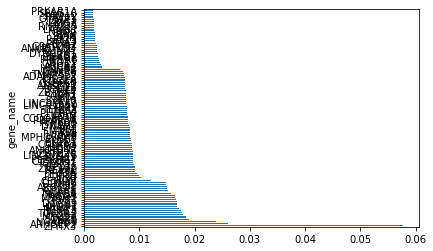

In [71]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
start=time.time()


clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)
prediction = clf_1.predict(X_test)
scores = cross_val_score(clf_1, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


feat_importances = pd.Series(clf_1.feature_importances_, index=final_8.columns)
feat_importances.nlargest(100).plot(kind='barh')
table=pd.DataFrame(feat_importances.nlargest(250), columns=["Importance"])
table_csv= table.to_csv('stringer.csv', index = True)
print(table)